In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv("data/ratings.csv")
movies = pd.read_csv("data/movies.csv")
data = pd.merge(movies, ratings)
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


## Data Preprocessing

In [3]:
data = data.drop(columns = ['genres', 'timestamp'])
data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),2,5.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),8,5.0
3,1,Toy Story (1995),11,4.0
4,1,Toy Story (1995),14,4.0


In [4]:
data = data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  105339 non-null  int64  
 1   title    105339 non-null  object 
 2   userId   105339 non-null  int64  
 3   rating   105339 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ MB


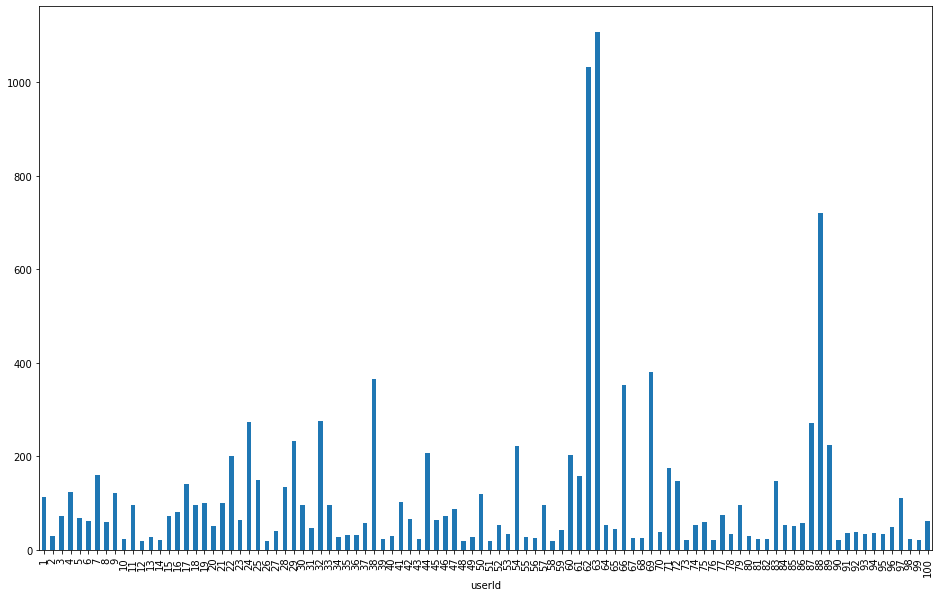

In [6]:
fig, ax=plt.subplots(figsize = (16, 10))
data.groupby('userId')['movieId'].count()[:100].plot(kind = 'bar')
plt.show()

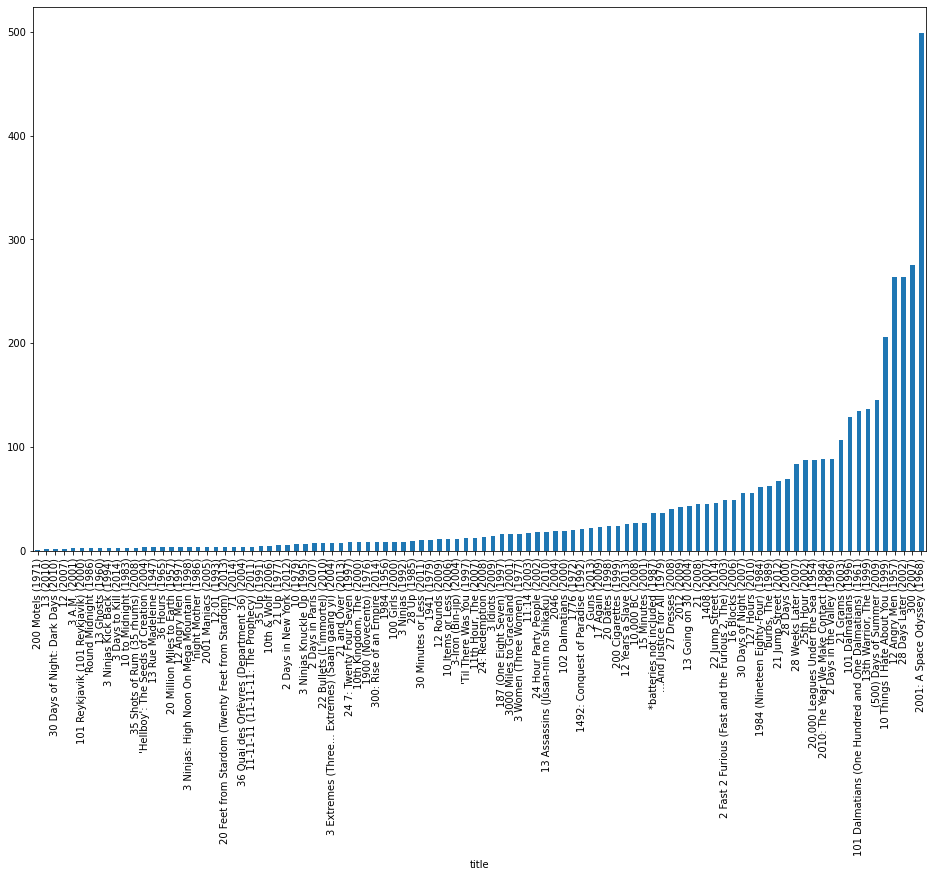

In [7]:
fig, ax=plt.subplots(figsize = (16, 10))
data.groupby('title')['rating'].sum()[:100].sort_values().plot(kind = 'bar')
plt.show()

## Restructuring Data

In [8]:
user_ratings = data.pivot_table(index=['userId'], columns=['title'], values = "rating")
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Minimizing Noise

In [9]:
user_ratings = user_ratings.dropna(thresh=10, axis=1)
user_ratings = user_ratings.fillna(0)
user_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),...,Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_data, test_data = train_test_split(user_ratings, test_size = 0.2)

In [12]:
train_data.shape

(534, 2315)

In [13]:
test_data.shape

(134, 2315)

## Model Building

In [14]:
class MovieRecommender():
    def fit(self, train_data):
        self.weights = train_data.corr(method = "pearson")    #item_similarities
        self.features = list(train_data.columns)
    def predict(self, test_data):
        def get_similar_movies(movie_name, user_rating):
            similar_score = self.weights.get(movie_name, pd.DataFrame(columns = self.features))*(user_rating)
            if len(similar_score)>0:
                similar_score = similar_score.sort_values(ascending = False) 

            return similar_score[:10]
        
        predictions = []
        count=0
        for test in np.array(test_data):
            print("Test case: {}/{}".format(count:= count+1, len(test_data)))
            predictions.append(get_similar_movies(test[0], float(test[1])))
    
        return(predictions)
            

## Model Training

In [15]:
model = MovieRecommender()
model.fit(train_data)

In [16]:
model.weights

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),...,Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.004775,0.280403,0.048315,0.134183,0.060277,0.091545,0.038456,0.141863,0.088043,...,0.027925,-0.020372,0.213085,0.010183,0.134800,0.231818,0.110116,0.265630,0.104504,0.115666
(500) Days of Summer (2009),0.004775,1.000000,0.031179,0.051691,0.141183,0.215322,0.070109,0.101308,0.105827,0.223362,...,-0.029107,-0.028363,0.255501,0.017565,0.259374,0.290927,0.264785,0.053235,0.104995,0.066468
*batteries not included (1987),0.280403,0.031179,1.000000,-0.014562,0.181197,0.099001,0.046707,0.130443,-0.016991,-0.018300,...,0.154578,-0.015556,0.081083,0.131336,0.034757,0.069323,0.018468,0.113965,-0.021692,0.144612
...And Justice for All (1979),0.048315,0.051691,-0.014562,1.000000,0.081886,-0.015414,0.053965,0.068264,0.188004,0.066033,...,0.065559,0.299241,0.101558,0.222939,0.290369,0.060372,0.191054,0.085174,0.273381,0.159958
10 Things I Hate About You (1999),0.134183,0.141183,0.181197,0.081886,1.000000,0.121925,0.069106,0.263110,0.059524,0.147885,...,0.146060,0.023137,0.208481,0.102480,0.194710,0.120928,0.236097,0.199546,0.108004,0.114487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombieland (2009),0.231818,0.290927,0.069323,0.060372,0.120928,0.124639,0.015987,0.044718,0.107187,0.367196,...,-0.005656,0.019203,0.462653,0.053096,0.372653,1.000000,0.250191,0.133217,0.291811,0.051746
Zoolander (2001),0.110116,0.264785,0.018468,0.191054,0.236097,0.072549,0.113931,0.125529,0.154799,0.137415,...,0.038040,0.106357,0.239063,0.203359,0.394673,0.250191,1.000000,0.186757,0.123682,0.142261
eXistenZ (1999),0.265630,0.053235,0.113965,0.085174,0.199546,-0.012578,0.044090,0.126622,0.099250,0.076295,...,0.010084,0.048500,0.153700,0.080112,0.206620,0.133217,0.186757,1.000000,0.103797,0.075870


## Model Testing

In [17]:
test_userId = test_data.index.tolist()

In [18]:
user_ids=[]
movie_titles=[]
reviews = []
for id in test_userId:
    cols = test_data.columns[test_data.loc[id, :]!=0.0]
    for col in cols:
        user_ids.append(id)
        movie_titles.append(col)
        reviews.append(test_data.loc[id, col])

df = {"userId": user_ids, 
         "title": movie_titles, 
         "reviews": reviews}

testcases=pd.DataFrame(df)
testcases

,userId,title,reviews
0,210,...And Justice for All (1979),3.0
1,210,"13th Warrior, The (1999)",5.0
2,210,2 Days in the Valley (1996),3.0
3,210,"7th Voyage of Sinbad, The (1958)",4.0
4,210,"Adventures of Baron Munchausen, The (1988)",4.0
...,...,...,...
17481,285,"Thomas Crown Affair, The (1999)",4.0
17482,285,Toy Story 2 (1999),5.0
17483,285,U-571 (2000),4.0
17484,285,White Squall (1996),4.0


In [19]:
predictions = model.predict(testcases[['title', 'reviews']])

Test case: 1/17486
Test case: 2/17486
Test case: 3/17486
Test case: 4/17486
Test case: 5/17486
Test case: 6/17486
Test case: 7/17486
Test case: 8/17486
Test case: 9/17486
Test case: 10/17486
Test case: 11/17486
Test case: 12/17486
Test case: 13/17486
Test case: 14/17486
Test case: 15/17486
Test case: 16/17486
Test case: 17/17486
Test case: 18/17486
Test case: 19/17486
Test case: 20/17486
Test case: 21/17486
Test case: 22/17486
Test case: 23/17486
Test case: 24/17486
Test case: 25/17486
Test case: 26/17486
Test case: 27/17486
Test case: 28/17486
Test case: 29/17486
Test case: 30/17486
Test case: 31/17486
Test case: 32/17486
Test case: 33/17486
Test case: 34/17486
Test case: 35/17486
Test case: 36/17486
Test case: 37/17486
Test case: 38/17486
Test case: 39/17486
Test case: 40/17486
Test case: 41/17486
Test case: 42/17486
Test case: 43/17486
Test case: 44/17486
Test case: 45/17486
Test case: 46/17486
Test case: 47/17486
Test case: 48/17486
Test case: 49/17486
Test case: 50/17486
Test case

Test case: 403/17486
Test case: 404/17486
Test case: 405/17486
Test case: 406/17486
Test case: 407/17486
Test case: 408/17486
Test case: 409/17486
Test case: 410/17486
Test case: 411/17486
Test case: 412/17486
Test case: 413/17486
Test case: 414/17486
Test case: 415/17486
Test case: 416/17486
Test case: 417/17486
Test case: 418/17486
Test case: 419/17486
Test case: 420/17486
Test case: 421/17486
Test case: 422/17486
Test case: 423/17486
Test case: 424/17486
Test case: 425/17486
Test case: 426/17486
Test case: 427/17486
Test case: 428/17486
Test case: 429/17486
Test case: 430/17486
Test case: 431/17486
Test case: 432/17486
Test case: 433/17486
Test case: 434/17486
Test case: 435/17486
Test case: 436/17486
Test case: 437/17486
Test case: 438/17486
Test case: 439/17486
Test case: 440/17486
Test case: 441/17486
Test case: 442/17486
Test case: 443/17486
Test case: 444/17486
Test case: 445/17486
Test case: 446/17486
Test case: 447/17486
Test case: 448/17486
Test case: 449/17486
Test case: 45

Test case: 796/17486
Test case: 797/17486
Test case: 798/17486
Test case: 799/17486
Test case: 800/17486
Test case: 801/17486
Test case: 802/17486
Test case: 803/17486
Test case: 804/17486
Test case: 805/17486
Test case: 806/17486
Test case: 807/17486
Test case: 808/17486
Test case: 809/17486
Test case: 810/17486
Test case: 811/17486
Test case: 812/17486
Test case: 813/17486
Test case: 814/17486
Test case: 815/17486
Test case: 816/17486
Test case: 817/17486
Test case: 818/17486
Test case: 819/17486
Test case: 820/17486
Test case: 821/17486
Test case: 822/17486
Test case: 823/17486
Test case: 824/17486
Test case: 825/17486
Test case: 826/17486
Test case: 827/17486
Test case: 828/17486
Test case: 829/17486
Test case: 830/17486
Test case: 831/17486
Test case: 832/17486
Test case: 833/17486
Test case: 834/17486
Test case: 835/17486
Test case: 836/17486
Test case: 837/17486
Test case: 838/17486
Test case: 839/17486
Test case: 840/17486
Test case: 841/17486
Test case: 842/17486
Test case: 84

Test case: 1186/17486
Test case: 1187/17486
Test case: 1188/17486
Test case: 1189/17486
Test case: 1190/17486
Test case: 1191/17486
Test case: 1192/17486
Test case: 1193/17486
Test case: 1194/17486
Test case: 1195/17486
Test case: 1196/17486
Test case: 1197/17486
Test case: 1198/17486
Test case: 1199/17486
Test case: 1200/17486
Test case: 1201/17486
Test case: 1202/17486
Test case: 1203/17486
Test case: 1204/17486
Test case: 1205/17486
Test case: 1206/17486
Test case: 1207/17486
Test case: 1208/17486
Test case: 1209/17486
Test case: 1210/17486
Test case: 1211/17486
Test case: 1212/17486
Test case: 1213/17486
Test case: 1214/17486
Test case: 1215/17486
Test case: 1216/17486
Test case: 1217/17486
Test case: 1218/17486
Test case: 1219/17486
Test case: 1220/17486
Test case: 1221/17486
Test case: 1222/17486
Test case: 1223/17486
Test case: 1224/17486
Test case: 1225/17486
Test case: 1226/17486
Test case: 1227/17486
Test case: 1228/17486
Test case: 1229/17486
Test case: 1230/17486
Test case:

Test case: 1561/17486
Test case: 1562/17486
Test case: 1563/17486
Test case: 1564/17486
Test case: 1565/17486
Test case: 1566/17486
Test case: 1567/17486
Test case: 1568/17486
Test case: 1569/17486
Test case: 1570/17486
Test case: 1571/17486
Test case: 1572/17486
Test case: 1573/17486
Test case: 1574/17486
Test case: 1575/17486
Test case: 1576/17486
Test case: 1577/17486
Test case: 1578/17486
Test case: 1579/17486
Test case: 1580/17486
Test case: 1581/17486
Test case: 1582/17486
Test case: 1583/17486
Test case: 1584/17486
Test case: 1585/17486
Test case: 1586/17486
Test case: 1587/17486
Test case: 1588/17486
Test case: 1589/17486
Test case: 1590/17486
Test case: 1591/17486
Test case: 1592/17486
Test case: 1593/17486
Test case: 1594/17486
Test case: 1595/17486
Test case: 1596/17486
Test case: 1597/17486
Test case: 1598/17486
Test case: 1599/17486
Test case: 1600/17486
Test case: 1601/17486
Test case: 1602/17486
Test case: 1603/17486
Test case: 1604/17486
Test case: 1605/17486
Test case:

Test case: 1937/17486
Test case: 1938/17486
Test case: 1939/17486
Test case: 1940/17486
Test case: 1941/17486
Test case: 1942/17486
Test case: 1943/17486
Test case: 1944/17486
Test case: 1945/17486
Test case: 1946/17486
Test case: 1947/17486
Test case: 1948/17486
Test case: 1949/17486
Test case: 1950/17486
Test case: 1951/17486
Test case: 1952/17486
Test case: 1953/17486
Test case: 1954/17486
Test case: 1955/17486
Test case: 1956/17486
Test case: 1957/17486
Test case: 1958/17486
Test case: 1959/17486
Test case: 1960/17486
Test case: 1961/17486
Test case: 1962/17486
Test case: 1963/17486
Test case: 1964/17486
Test case: 1965/17486
Test case: 1966/17486
Test case: 1967/17486
Test case: 1968/17486
Test case: 1969/17486
Test case: 1970/17486
Test case: 1971/17486
Test case: 1972/17486
Test case: 1973/17486
Test case: 1974/17486
Test case: 1975/17486
Test case: 1976/17486
Test case: 1977/17486
Test case: 1978/17486
Test case: 1979/17486
Test case: 1980/17486
Test case: 1981/17486
Test case:

Test case: 2317/17486
Test case: 2318/17486
Test case: 2319/17486
Test case: 2320/17486
Test case: 2321/17486
Test case: 2322/17486
Test case: 2323/17486
Test case: 2324/17486
Test case: 2325/17486
Test case: 2326/17486
Test case: 2327/17486
Test case: 2328/17486
Test case: 2329/17486
Test case: 2330/17486
Test case: 2331/17486
Test case: 2332/17486
Test case: 2333/17486
Test case: 2334/17486
Test case: 2335/17486
Test case: 2336/17486
Test case: 2337/17486
Test case: 2338/17486
Test case: 2339/17486
Test case: 2340/17486
Test case: 2341/17486
Test case: 2342/17486
Test case: 2343/17486
Test case: 2344/17486
Test case: 2345/17486
Test case: 2346/17486
Test case: 2347/17486
Test case: 2348/17486
Test case: 2349/17486
Test case: 2350/17486
Test case: 2351/17486
Test case: 2352/17486
Test case: 2353/17486
Test case: 2354/17486
Test case: 2355/17486
Test case: 2356/17486
Test case: 2357/17486
Test case: 2358/17486
Test case: 2359/17486
Test case: 2360/17486
Test case: 2361/17486
Test case:

Test case: 2696/17486
Test case: 2697/17486
Test case: 2698/17486
Test case: 2699/17486
Test case: 2700/17486
Test case: 2701/17486
Test case: 2702/17486
Test case: 2703/17486
Test case: 2704/17486
Test case: 2705/17486
Test case: 2706/17486
Test case: 2707/17486
Test case: 2708/17486
Test case: 2709/17486
Test case: 2710/17486
Test case: 2711/17486
Test case: 2712/17486
Test case: 2713/17486
Test case: 2714/17486
Test case: 2715/17486
Test case: 2716/17486
Test case: 2717/17486
Test case: 2718/17486
Test case: 2719/17486
Test case: 2720/17486
Test case: 2721/17486
Test case: 2722/17486
Test case: 2723/17486
Test case: 2724/17486
Test case: 2725/17486
Test case: 2726/17486
Test case: 2727/17486
Test case: 2728/17486
Test case: 2729/17486
Test case: 2730/17486
Test case: 2731/17486
Test case: 2732/17486
Test case: 2733/17486
Test case: 2734/17486
Test case: 2735/17486
Test case: 2736/17486
Test case: 2737/17486
Test case: 2738/17486
Test case: 2739/17486
Test case: 2740/17486
Test case:

Test case: 3076/17486
Test case: 3077/17486
Test case: 3078/17486
Test case: 3079/17486
Test case: 3080/17486
Test case: 3081/17486
Test case: 3082/17486
Test case: 3083/17486
Test case: 3084/17486
Test case: 3085/17486
Test case: 3086/17486
Test case: 3087/17486
Test case: 3088/17486
Test case: 3089/17486
Test case: 3090/17486
Test case: 3091/17486
Test case: 3092/17486
Test case: 3093/17486
Test case: 3094/17486
Test case: 3095/17486
Test case: 3096/17486
Test case: 3097/17486
Test case: 3098/17486
Test case: 3099/17486
Test case: 3100/17486
Test case: 3101/17486
Test case: 3102/17486
Test case: 3103/17486
Test case: 3104/17486
Test case: 3105/17486
Test case: 3106/17486
Test case: 3107/17486
Test case: 3108/17486
Test case: 3109/17486
Test case: 3110/17486
Test case: 3111/17486
Test case: 3112/17486
Test case: 3113/17486
Test case: 3114/17486
Test case: 3115/17486
Test case: 3116/17486
Test case: 3117/17486
Test case: 3118/17486
Test case: 3119/17486
Test case: 3120/17486
Test case:

Test case: 3451/17486
Test case: 3452/17486
Test case: 3453/17486
Test case: 3454/17486
Test case: 3455/17486
Test case: 3456/17486
Test case: 3457/17486
Test case: 3458/17486
Test case: 3459/17486
Test case: 3460/17486
Test case: 3461/17486
Test case: 3462/17486
Test case: 3463/17486
Test case: 3464/17486
Test case: 3465/17486
Test case: 3466/17486
Test case: 3467/17486
Test case: 3468/17486
Test case: 3469/17486
Test case: 3470/17486
Test case: 3471/17486
Test case: 3472/17486
Test case: 3473/17486
Test case: 3474/17486
Test case: 3475/17486
Test case: 3476/17486
Test case: 3477/17486
Test case: 3478/17486
Test case: 3479/17486
Test case: 3480/17486
Test case: 3481/17486
Test case: 3482/17486
Test case: 3483/17486
Test case: 3484/17486
Test case: 3485/17486
Test case: 3486/17486
Test case: 3487/17486
Test case: 3488/17486
Test case: 3489/17486
Test case: 3490/17486
Test case: 3491/17486
Test case: 3492/17486
Test case: 3493/17486
Test case: 3494/17486
Test case: 3495/17486
Test case:

Test case: 3829/17486
Test case: 3830/17486
Test case: 3831/17486
Test case: 3832/17486
Test case: 3833/17486
Test case: 3834/17486
Test case: 3835/17486
Test case: 3836/17486
Test case: 3837/17486
Test case: 3838/17486
Test case: 3839/17486
Test case: 3840/17486
Test case: 3841/17486
Test case: 3842/17486
Test case: 3843/17486
Test case: 3844/17486
Test case: 3845/17486
Test case: 3846/17486
Test case: 3847/17486
Test case: 3848/17486
Test case: 3849/17486
Test case: 3850/17486
Test case: 3851/17486
Test case: 3852/17486
Test case: 3853/17486
Test case: 3854/17486
Test case: 3855/17486
Test case: 3856/17486
Test case: 3857/17486
Test case: 3858/17486
Test case: 3859/17486
Test case: 3860/17486
Test case: 3861/17486
Test case: 3862/17486
Test case: 3863/17486
Test case: 3864/17486
Test case: 3865/17486
Test case: 3866/17486
Test case: 3867/17486
Test case: 3868/17486
Test case: 3869/17486
Test case: 3870/17486
Test case: 3871/17486
Test case: 3872/17486
Test case: 3873/17486
Test case:

Test case: 4209/17486
Test case: 4210/17486
Test case: 4211/17486
Test case: 4212/17486
Test case: 4213/17486
Test case: 4214/17486
Test case: 4215/17486
Test case: 4216/17486
Test case: 4217/17486
Test case: 4218/17486
Test case: 4219/17486
Test case: 4220/17486
Test case: 4221/17486
Test case: 4222/17486
Test case: 4223/17486
Test case: 4224/17486
Test case: 4225/17486
Test case: 4226/17486
Test case: 4227/17486
Test case: 4228/17486
Test case: 4229/17486
Test case: 4230/17486
Test case: 4231/17486
Test case: 4232/17486
Test case: 4233/17486
Test case: 4234/17486
Test case: 4235/17486
Test case: 4236/17486
Test case: 4237/17486
Test case: 4238/17486
Test case: 4239/17486
Test case: 4240/17486
Test case: 4241/17486
Test case: 4242/17486
Test case: 4243/17486
Test case: 4244/17486
Test case: 4245/17486
Test case: 4246/17486
Test case: 4247/17486
Test case: 4248/17486
Test case: 4249/17486
Test case: 4250/17486
Test case: 4251/17486
Test case: 4252/17486
Test case: 4253/17486
Test case:

Test case: 4591/17486
Test case: 4592/17486
Test case: 4593/17486
Test case: 4594/17486
Test case: 4595/17486
Test case: 4596/17486
Test case: 4597/17486
Test case: 4598/17486
Test case: 4599/17486
Test case: 4600/17486
Test case: 4601/17486
Test case: 4602/17486
Test case: 4603/17486
Test case: 4604/17486
Test case: 4605/17486
Test case: 4606/17486
Test case: 4607/17486
Test case: 4608/17486
Test case: 4609/17486
Test case: 4610/17486
Test case: 4611/17486
Test case: 4612/17486
Test case: 4613/17486
Test case: 4614/17486
Test case: 4615/17486
Test case: 4616/17486
Test case: 4617/17486
Test case: 4618/17486
Test case: 4619/17486
Test case: 4620/17486
Test case: 4621/17486
Test case: 4622/17486
Test case: 4623/17486
Test case: 4624/17486
Test case: 4625/17486
Test case: 4626/17486
Test case: 4627/17486
Test case: 4628/17486
Test case: 4629/17486
Test case: 4630/17486
Test case: 4631/17486
Test case: 4632/17486
Test case: 4633/17486
Test case: 4634/17486
Test case: 4635/17486
Test case:

Test case: 4965/17486
Test case: 4966/17486
Test case: 4967/17486
Test case: 4968/17486
Test case: 4969/17486
Test case: 4970/17486
Test case: 4971/17486
Test case: 4972/17486
Test case: 4973/17486
Test case: 4974/17486
Test case: 4975/17486
Test case: 4976/17486
Test case: 4977/17486
Test case: 4978/17486
Test case: 4979/17486
Test case: 4980/17486
Test case: 4981/17486
Test case: 4982/17486
Test case: 4983/17486
Test case: 4984/17486
Test case: 4985/17486
Test case: 4986/17486
Test case: 4987/17486
Test case: 4988/17486
Test case: 4989/17486
Test case: 4990/17486
Test case: 4991/17486
Test case: 4992/17486
Test case: 4993/17486
Test case: 4994/17486
Test case: 4995/17486
Test case: 4996/17486
Test case: 4997/17486
Test case: 4998/17486
Test case: 4999/17486
Test case: 5000/17486
Test case: 5001/17486
Test case: 5002/17486
Test case: 5003/17486
Test case: 5004/17486
Test case: 5005/17486
Test case: 5006/17486
Test case: 5007/17486
Test case: 5008/17486
Test case: 5009/17486
Test case:

Test case: 5340/17486
Test case: 5341/17486
Test case: 5342/17486
Test case: 5343/17486
Test case: 5344/17486
Test case: 5345/17486
Test case: 5346/17486
Test case: 5347/17486
Test case: 5348/17486
Test case: 5349/17486
Test case: 5350/17486
Test case: 5351/17486
Test case: 5352/17486
Test case: 5353/17486
Test case: 5354/17486
Test case: 5355/17486
Test case: 5356/17486
Test case: 5357/17486
Test case: 5358/17486
Test case: 5359/17486
Test case: 5360/17486
Test case: 5361/17486
Test case: 5362/17486
Test case: 5363/17486
Test case: 5364/17486
Test case: 5365/17486
Test case: 5366/17486
Test case: 5367/17486
Test case: 5368/17486
Test case: 5369/17486
Test case: 5370/17486
Test case: 5371/17486
Test case: 5372/17486
Test case: 5373/17486
Test case: 5374/17486
Test case: 5375/17486
Test case: 5376/17486
Test case: 5377/17486
Test case: 5378/17486
Test case: 5379/17486
Test case: 5380/17486
Test case: 5381/17486
Test case: 5382/17486
Test case: 5383/17486
Test case: 5384/17486
Test case:

Test case: 5718/17486
Test case: 5719/17486
Test case: 5720/17486
Test case: 5721/17486
Test case: 5722/17486
Test case: 5723/17486
Test case: 5724/17486
Test case: 5725/17486
Test case: 5726/17486
Test case: 5727/17486
Test case: 5728/17486
Test case: 5729/17486
Test case: 5730/17486
Test case: 5731/17486
Test case: 5732/17486
Test case: 5733/17486
Test case: 5734/17486
Test case: 5735/17486
Test case: 5736/17486
Test case: 5737/17486
Test case: 5738/17486
Test case: 5739/17486
Test case: 5740/17486
Test case: 5741/17486
Test case: 5742/17486
Test case: 5743/17486
Test case: 5744/17486
Test case: 5745/17486
Test case: 5746/17486
Test case: 5747/17486
Test case: 5748/17486
Test case: 5749/17486
Test case: 5750/17486
Test case: 5751/17486
Test case: 5752/17486
Test case: 5753/17486
Test case: 5754/17486
Test case: 5755/17486
Test case: 5756/17486
Test case: 5757/17486
Test case: 5758/17486
Test case: 5759/17486
Test case: 5760/17486
Test case: 5761/17486
Test case: 5762/17486
Test case:

Test case: 6099/17486
Test case: 6100/17486
Test case: 6101/17486
Test case: 6102/17486
Test case: 6103/17486
Test case: 6104/17486
Test case: 6105/17486
Test case: 6106/17486
Test case: 6107/17486
Test case: 6108/17486
Test case: 6109/17486
Test case: 6110/17486
Test case: 6111/17486
Test case: 6112/17486
Test case: 6113/17486
Test case: 6114/17486
Test case: 6115/17486
Test case: 6116/17486
Test case: 6117/17486
Test case: 6118/17486
Test case: 6119/17486
Test case: 6120/17486
Test case: 6121/17486
Test case: 6122/17486
Test case: 6123/17486
Test case: 6124/17486
Test case: 6125/17486
Test case: 6126/17486
Test case: 6127/17486
Test case: 6128/17486
Test case: 6129/17486
Test case: 6130/17486
Test case: 6131/17486
Test case: 6132/17486
Test case: 6133/17486
Test case: 6134/17486
Test case: 6135/17486
Test case: 6136/17486
Test case: 6137/17486
Test case: 6138/17486
Test case: 6139/17486
Test case: 6140/17486
Test case: 6141/17486
Test case: 6142/17486
Test case: 6143/17486
Test case:

Test case: 6477/17486
Test case: 6478/17486
Test case: 6479/17486
Test case: 6480/17486
Test case: 6481/17486
Test case: 6482/17486
Test case: 6483/17486
Test case: 6484/17486
Test case: 6485/17486
Test case: 6486/17486
Test case: 6487/17486
Test case: 6488/17486
Test case: 6489/17486
Test case: 6490/17486
Test case: 6491/17486
Test case: 6492/17486
Test case: 6493/17486
Test case: 6494/17486
Test case: 6495/17486
Test case: 6496/17486
Test case: 6497/17486
Test case: 6498/17486
Test case: 6499/17486
Test case: 6500/17486
Test case: 6501/17486
Test case: 6502/17486
Test case: 6503/17486
Test case: 6504/17486
Test case: 6505/17486
Test case: 6506/17486
Test case: 6507/17486
Test case: 6508/17486
Test case: 6509/17486
Test case: 6510/17486
Test case: 6511/17486
Test case: 6512/17486
Test case: 6513/17486
Test case: 6514/17486
Test case: 6515/17486
Test case: 6516/17486
Test case: 6517/17486
Test case: 6518/17486
Test case: 6519/17486
Test case: 6520/17486
Test case: 6521/17486
Test case:

Test case: 6856/17486
Test case: 6857/17486
Test case: 6858/17486
Test case: 6859/17486
Test case: 6860/17486
Test case: 6861/17486
Test case: 6862/17486
Test case: 6863/17486
Test case: 6864/17486
Test case: 6865/17486
Test case: 6866/17486
Test case: 6867/17486
Test case: 6868/17486
Test case: 6869/17486
Test case: 6870/17486
Test case: 6871/17486
Test case: 6872/17486
Test case: 6873/17486
Test case: 6874/17486
Test case: 6875/17486
Test case: 6876/17486
Test case: 6877/17486
Test case: 6878/17486
Test case: 6879/17486
Test case: 6880/17486
Test case: 6881/17486
Test case: 6882/17486
Test case: 6883/17486
Test case: 6884/17486
Test case: 6885/17486
Test case: 6886/17486
Test case: 6887/17486
Test case: 6888/17486
Test case: 6889/17486
Test case: 6890/17486
Test case: 6891/17486
Test case: 6892/17486
Test case: 6893/17486
Test case: 6894/17486
Test case: 6895/17486
Test case: 6896/17486
Test case: 6897/17486
Test case: 6898/17486
Test case: 6899/17486
Test case: 6900/17486
Test case:

Test case: 7232/17486
Test case: 7233/17486
Test case: 7234/17486
Test case: 7235/17486
Test case: 7236/17486
Test case: 7237/17486
Test case: 7238/17486
Test case: 7239/17486
Test case: 7240/17486
Test case: 7241/17486
Test case: 7242/17486
Test case: 7243/17486
Test case: 7244/17486
Test case: 7245/17486
Test case: 7246/17486
Test case: 7247/17486
Test case: 7248/17486
Test case: 7249/17486
Test case: 7250/17486
Test case: 7251/17486
Test case: 7252/17486
Test case: 7253/17486
Test case: 7254/17486
Test case: 7255/17486
Test case: 7256/17486
Test case: 7257/17486
Test case: 7258/17486
Test case: 7259/17486
Test case: 7260/17486
Test case: 7261/17486
Test case: 7262/17486
Test case: 7263/17486
Test case: 7264/17486
Test case: 7265/17486
Test case: 7266/17486
Test case: 7267/17486
Test case: 7268/17486
Test case: 7269/17486
Test case: 7270/17486
Test case: 7271/17486
Test case: 7272/17486
Test case: 7273/17486
Test case: 7274/17486
Test case: 7275/17486
Test case: 7276/17486
Test case:

Test case: 7605/17486
Test case: 7606/17486
Test case: 7607/17486
Test case: 7608/17486
Test case: 7609/17486
Test case: 7610/17486
Test case: 7611/17486
Test case: 7612/17486
Test case: 7613/17486
Test case: 7614/17486
Test case: 7615/17486
Test case: 7616/17486
Test case: 7617/17486
Test case: 7618/17486
Test case: 7619/17486
Test case: 7620/17486
Test case: 7621/17486
Test case: 7622/17486
Test case: 7623/17486
Test case: 7624/17486
Test case: 7625/17486
Test case: 7626/17486
Test case: 7627/17486
Test case: 7628/17486
Test case: 7629/17486
Test case: 7630/17486
Test case: 7631/17486
Test case: 7632/17486
Test case: 7633/17486
Test case: 7634/17486
Test case: 7635/17486
Test case: 7636/17486
Test case: 7637/17486
Test case: 7638/17486
Test case: 7639/17486
Test case: 7640/17486
Test case: 7641/17486
Test case: 7642/17486
Test case: 7643/17486
Test case: 7644/17486
Test case: 7645/17486
Test case: 7646/17486
Test case: 7647/17486
Test case: 7648/17486
Test case: 7649/17486
Test case:

Test case: 7980/17486
Test case: 7981/17486
Test case: 7982/17486
Test case: 7983/17486
Test case: 7984/17486
Test case: 7985/17486
Test case: 7986/17486
Test case: 7987/17486
Test case: 7988/17486
Test case: 7989/17486
Test case: 7990/17486
Test case: 7991/17486
Test case: 7992/17486
Test case: 7993/17486
Test case: 7994/17486
Test case: 7995/17486
Test case: 7996/17486
Test case: 7997/17486
Test case: 7998/17486
Test case: 7999/17486
Test case: 8000/17486
Test case: 8001/17486
Test case: 8002/17486
Test case: 8003/17486
Test case: 8004/17486
Test case: 8005/17486
Test case: 8006/17486
Test case: 8007/17486
Test case: 8008/17486
Test case: 8009/17486
Test case: 8010/17486
Test case: 8011/17486
Test case: 8012/17486
Test case: 8013/17486
Test case: 8014/17486
Test case: 8015/17486
Test case: 8016/17486
Test case: 8017/17486
Test case: 8018/17486
Test case: 8019/17486
Test case: 8020/17486
Test case: 8021/17486
Test case: 8022/17486
Test case: 8023/17486
Test case: 8024/17486
Test case:

Test case: 8357/17486
Test case: 8358/17486
Test case: 8359/17486
Test case: 8360/17486
Test case: 8361/17486
Test case: 8362/17486
Test case: 8363/17486
Test case: 8364/17486
Test case: 8365/17486
Test case: 8366/17486
Test case: 8367/17486
Test case: 8368/17486
Test case: 8369/17486
Test case: 8370/17486
Test case: 8371/17486
Test case: 8372/17486
Test case: 8373/17486
Test case: 8374/17486
Test case: 8375/17486
Test case: 8376/17486
Test case: 8377/17486
Test case: 8378/17486
Test case: 8379/17486
Test case: 8380/17486
Test case: 8381/17486
Test case: 8382/17486
Test case: 8383/17486
Test case: 8384/17486
Test case: 8385/17486
Test case: 8386/17486
Test case: 8387/17486
Test case: 8388/17486
Test case: 8389/17486
Test case: 8390/17486
Test case: 8391/17486
Test case: 8392/17486
Test case: 8393/17486
Test case: 8394/17486
Test case: 8395/17486
Test case: 8396/17486
Test case: 8397/17486
Test case: 8398/17486
Test case: 8399/17486
Test case: 8400/17486
Test case: 8401/17486
Test case:

Test case: 8730/17486
Test case: 8731/17486
Test case: 8732/17486
Test case: 8733/17486
Test case: 8734/17486
Test case: 8735/17486
Test case: 8736/17486
Test case: 8737/17486
Test case: 8738/17486
Test case: 8739/17486
Test case: 8740/17486
Test case: 8741/17486
Test case: 8742/17486
Test case: 8743/17486
Test case: 8744/17486
Test case: 8745/17486
Test case: 8746/17486
Test case: 8747/17486
Test case: 8748/17486
Test case: 8749/17486
Test case: 8750/17486
Test case: 8751/17486
Test case: 8752/17486
Test case: 8753/17486
Test case: 8754/17486
Test case: 8755/17486
Test case: 8756/17486
Test case: 8757/17486
Test case: 8758/17486
Test case: 8759/17486
Test case: 8760/17486
Test case: 8761/17486
Test case: 8762/17486
Test case: 8763/17486
Test case: 8764/17486
Test case: 8765/17486
Test case: 8766/17486
Test case: 8767/17486
Test case: 8768/17486
Test case: 8769/17486
Test case: 8770/17486
Test case: 8771/17486
Test case: 8772/17486
Test case: 8773/17486
Test case: 8774/17486
Test case:

Test case: 9107/17486
Test case: 9108/17486
Test case: 9109/17486
Test case: 9110/17486
Test case: 9111/17486
Test case: 9112/17486
Test case: 9113/17486
Test case: 9114/17486
Test case: 9115/17486
Test case: 9116/17486
Test case: 9117/17486
Test case: 9118/17486
Test case: 9119/17486
Test case: 9120/17486
Test case: 9121/17486
Test case: 9122/17486
Test case: 9123/17486
Test case: 9124/17486
Test case: 9125/17486
Test case: 9126/17486
Test case: 9127/17486
Test case: 9128/17486
Test case: 9129/17486
Test case: 9130/17486
Test case: 9131/17486
Test case: 9132/17486
Test case: 9133/17486
Test case: 9134/17486
Test case: 9135/17486
Test case: 9136/17486
Test case: 9137/17486
Test case: 9138/17486
Test case: 9139/17486
Test case: 9140/17486
Test case: 9141/17486
Test case: 9142/17486
Test case: 9143/17486
Test case: 9144/17486
Test case: 9145/17486
Test case: 9146/17486
Test case: 9147/17486
Test case: 9148/17486
Test case: 9149/17486
Test case: 9150/17486
Test case: 9151/17486
Test case:

Test case: 9483/17486
Test case: 9484/17486
Test case: 9485/17486
Test case: 9486/17486
Test case: 9487/17486
Test case: 9488/17486
Test case: 9489/17486
Test case: 9490/17486
Test case: 9491/17486
Test case: 9492/17486
Test case: 9493/17486
Test case: 9494/17486
Test case: 9495/17486
Test case: 9496/17486
Test case: 9497/17486
Test case: 9498/17486
Test case: 9499/17486
Test case: 9500/17486
Test case: 9501/17486
Test case: 9502/17486
Test case: 9503/17486
Test case: 9504/17486
Test case: 9505/17486
Test case: 9506/17486
Test case: 9507/17486
Test case: 9508/17486
Test case: 9509/17486
Test case: 9510/17486
Test case: 9511/17486
Test case: 9512/17486
Test case: 9513/17486
Test case: 9514/17486
Test case: 9515/17486
Test case: 9516/17486
Test case: 9517/17486
Test case: 9518/17486
Test case: 9519/17486
Test case: 9520/17486
Test case: 9521/17486
Test case: 9522/17486
Test case: 9523/17486
Test case: 9524/17486
Test case: 9525/17486
Test case: 9526/17486
Test case: 9527/17486
Test case:

Test case: 9856/17486
Test case: 9857/17486
Test case: 9858/17486
Test case: 9859/17486
Test case: 9860/17486
Test case: 9861/17486
Test case: 9862/17486
Test case: 9863/17486
Test case: 9864/17486
Test case: 9865/17486
Test case: 9866/17486
Test case: 9867/17486
Test case: 9868/17486
Test case: 9869/17486
Test case: 9870/17486
Test case: 9871/17486
Test case: 9872/17486
Test case: 9873/17486
Test case: 9874/17486
Test case: 9875/17486
Test case: 9876/17486
Test case: 9877/17486
Test case: 9878/17486
Test case: 9879/17486
Test case: 9880/17486
Test case: 9881/17486
Test case: 9882/17486
Test case: 9883/17486
Test case: 9884/17486
Test case: 9885/17486
Test case: 9886/17486
Test case: 9887/17486
Test case: 9888/17486
Test case: 9889/17486
Test case: 9890/17486
Test case: 9891/17486
Test case: 9892/17486
Test case: 9893/17486
Test case: 9894/17486
Test case: 9895/17486
Test case: 9896/17486
Test case: 9897/17486
Test case: 9898/17486
Test case: 9899/17486
Test case: 9900/17486
Test case:

Test case: 10221/17486
Test case: 10222/17486
Test case: 10223/17486
Test case: 10224/17486
Test case: 10225/17486
Test case: 10226/17486
Test case: 10227/17486
Test case: 10228/17486
Test case: 10229/17486
Test case: 10230/17486
Test case: 10231/17486
Test case: 10232/17486
Test case: 10233/17486
Test case: 10234/17486
Test case: 10235/17486
Test case: 10236/17486
Test case: 10237/17486
Test case: 10238/17486
Test case: 10239/17486
Test case: 10240/17486
Test case: 10241/17486
Test case: 10242/17486
Test case: 10243/17486
Test case: 10244/17486
Test case: 10245/17486
Test case: 10246/17486
Test case: 10247/17486
Test case: 10248/17486
Test case: 10249/17486
Test case: 10250/17486
Test case: 10251/17486
Test case: 10252/17486
Test case: 10253/17486
Test case: 10254/17486
Test case: 10255/17486
Test case: 10256/17486
Test case: 10257/17486
Test case: 10258/17486
Test case: 10259/17486
Test case: 10260/17486
Test case: 10261/17486
Test case: 10262/17486
Test case: 10263/17486
Test case: 

Test case: 10579/17486
Test case: 10580/17486
Test case: 10581/17486
Test case: 10582/17486
Test case: 10583/17486
Test case: 10584/17486
Test case: 10585/17486
Test case: 10586/17486
Test case: 10587/17486
Test case: 10588/17486
Test case: 10589/17486
Test case: 10590/17486
Test case: 10591/17486
Test case: 10592/17486
Test case: 10593/17486
Test case: 10594/17486
Test case: 10595/17486
Test case: 10596/17486
Test case: 10597/17486
Test case: 10598/17486
Test case: 10599/17486
Test case: 10600/17486
Test case: 10601/17486
Test case: 10602/17486
Test case: 10603/17486
Test case: 10604/17486
Test case: 10605/17486
Test case: 10606/17486
Test case: 10607/17486
Test case: 10608/17486
Test case: 10609/17486
Test case: 10610/17486
Test case: 10611/17486
Test case: 10612/17486
Test case: 10613/17486
Test case: 10614/17486
Test case: 10615/17486
Test case: 10616/17486
Test case: 10617/17486
Test case: 10618/17486
Test case: 10619/17486
Test case: 10620/17486
Test case: 10621/17486
Test case: 

Test case: 10941/17486
Test case: 10942/17486
Test case: 10943/17486
Test case: 10944/17486
Test case: 10945/17486
Test case: 10946/17486
Test case: 10947/17486
Test case: 10948/17486
Test case: 10949/17486
Test case: 10950/17486
Test case: 10951/17486
Test case: 10952/17486
Test case: 10953/17486
Test case: 10954/17486
Test case: 10955/17486
Test case: 10956/17486
Test case: 10957/17486
Test case: 10958/17486
Test case: 10959/17486
Test case: 10960/17486
Test case: 10961/17486
Test case: 10962/17486
Test case: 10963/17486
Test case: 10964/17486
Test case: 10965/17486
Test case: 10966/17486
Test case: 10967/17486
Test case: 10968/17486
Test case: 10969/17486
Test case: 10970/17486
Test case: 10971/17486
Test case: 10972/17486
Test case: 10973/17486
Test case: 10974/17486
Test case: 10975/17486
Test case: 10976/17486
Test case: 10977/17486
Test case: 10978/17486
Test case: 10979/17486
Test case: 10980/17486
Test case: 10981/17486
Test case: 10982/17486
Test case: 10983/17486
Test case: 

Test case: 11302/17486
Test case: 11303/17486
Test case: 11304/17486
Test case: 11305/17486
Test case: 11306/17486
Test case: 11307/17486
Test case: 11308/17486
Test case: 11309/17486
Test case: 11310/17486
Test case: 11311/17486
Test case: 11312/17486
Test case: 11313/17486
Test case: 11314/17486
Test case: 11315/17486
Test case: 11316/17486
Test case: 11317/17486
Test case: 11318/17486
Test case: 11319/17486
Test case: 11320/17486
Test case: 11321/17486
Test case: 11322/17486
Test case: 11323/17486
Test case: 11324/17486
Test case: 11325/17486
Test case: 11326/17486
Test case: 11327/17486
Test case: 11328/17486
Test case: 11329/17486
Test case: 11330/17486
Test case: 11331/17486
Test case: 11332/17486
Test case: 11333/17486
Test case: 11334/17486
Test case: 11335/17486
Test case: 11336/17486
Test case: 11337/17486
Test case: 11338/17486
Test case: 11339/17486
Test case: 11340/17486
Test case: 11341/17486
Test case: 11342/17486
Test case: 11343/17486
Test case: 11344/17486
Test case: 

Test case: 11663/17486
Test case: 11664/17486
Test case: 11665/17486
Test case: 11666/17486
Test case: 11667/17486
Test case: 11668/17486
Test case: 11669/17486
Test case: 11670/17486
Test case: 11671/17486
Test case: 11672/17486
Test case: 11673/17486
Test case: 11674/17486
Test case: 11675/17486
Test case: 11676/17486
Test case: 11677/17486
Test case: 11678/17486
Test case: 11679/17486
Test case: 11680/17486
Test case: 11681/17486
Test case: 11682/17486
Test case: 11683/17486
Test case: 11684/17486
Test case: 11685/17486
Test case: 11686/17486
Test case: 11687/17486
Test case: 11688/17486
Test case: 11689/17486
Test case: 11690/17486
Test case: 11691/17486
Test case: 11692/17486
Test case: 11693/17486
Test case: 11694/17486
Test case: 11695/17486
Test case: 11696/17486
Test case: 11697/17486
Test case: 11698/17486
Test case: 11699/17486
Test case: 11700/17486
Test case: 11701/17486
Test case: 11702/17486
Test case: 11703/17486
Test case: 11704/17486
Test case: 11705/17486
Test case: 

Test case: 12020/17486
Test case: 12021/17486
Test case: 12022/17486
Test case: 12023/17486
Test case: 12024/17486
Test case: 12025/17486
Test case: 12026/17486
Test case: 12027/17486
Test case: 12028/17486
Test case: 12029/17486
Test case: 12030/17486
Test case: 12031/17486
Test case: 12032/17486
Test case: 12033/17486
Test case: 12034/17486
Test case: 12035/17486
Test case: 12036/17486
Test case: 12037/17486
Test case: 12038/17486
Test case: 12039/17486
Test case: 12040/17486
Test case: 12041/17486
Test case: 12042/17486
Test case: 12043/17486
Test case: 12044/17486
Test case: 12045/17486
Test case: 12046/17486
Test case: 12047/17486
Test case: 12048/17486
Test case: 12049/17486
Test case: 12050/17486
Test case: 12051/17486
Test case: 12052/17486
Test case: 12053/17486
Test case: 12054/17486
Test case: 12055/17486
Test case: 12056/17486
Test case: 12057/17486
Test case: 12058/17486
Test case: 12059/17486
Test case: 12060/17486
Test case: 12061/17486
Test case: 12062/17486
Test case: 

Test case: 12381/17486
Test case: 12382/17486
Test case: 12383/17486
Test case: 12384/17486
Test case: 12385/17486
Test case: 12386/17486
Test case: 12387/17486
Test case: 12388/17486
Test case: 12389/17486
Test case: 12390/17486
Test case: 12391/17486
Test case: 12392/17486
Test case: 12393/17486
Test case: 12394/17486
Test case: 12395/17486
Test case: 12396/17486
Test case: 12397/17486
Test case: 12398/17486
Test case: 12399/17486
Test case: 12400/17486
Test case: 12401/17486
Test case: 12402/17486
Test case: 12403/17486
Test case: 12404/17486
Test case: 12405/17486
Test case: 12406/17486
Test case: 12407/17486
Test case: 12408/17486
Test case: 12409/17486
Test case: 12410/17486
Test case: 12411/17486
Test case: 12412/17486
Test case: 12413/17486
Test case: 12414/17486
Test case: 12415/17486
Test case: 12416/17486
Test case: 12417/17486
Test case: 12418/17486
Test case: 12419/17486
Test case: 12420/17486
Test case: 12421/17486
Test case: 12422/17486
Test case: 12423/17486
Test case: 

Test case: 12741/17486
Test case: 12742/17486
Test case: 12743/17486
Test case: 12744/17486
Test case: 12745/17486
Test case: 12746/17486
Test case: 12747/17486
Test case: 12748/17486
Test case: 12749/17486
Test case: 12750/17486
Test case: 12751/17486
Test case: 12752/17486
Test case: 12753/17486
Test case: 12754/17486
Test case: 12755/17486
Test case: 12756/17486
Test case: 12757/17486
Test case: 12758/17486
Test case: 12759/17486
Test case: 12760/17486
Test case: 12761/17486
Test case: 12762/17486
Test case: 12763/17486
Test case: 12764/17486
Test case: 12765/17486
Test case: 12766/17486
Test case: 12767/17486
Test case: 12768/17486
Test case: 12769/17486
Test case: 12770/17486
Test case: 12771/17486
Test case: 12772/17486
Test case: 12773/17486
Test case: 12774/17486
Test case: 12775/17486
Test case: 12776/17486
Test case: 12777/17486
Test case: 12778/17486
Test case: 12779/17486
Test case: 12780/17486
Test case: 12781/17486
Test case: 12782/17486
Test case: 12783/17486
Test case: 

Test case: 13098/17486
Test case: 13099/17486
Test case: 13100/17486
Test case: 13101/17486
Test case: 13102/17486
Test case: 13103/17486
Test case: 13104/17486
Test case: 13105/17486
Test case: 13106/17486
Test case: 13107/17486
Test case: 13108/17486
Test case: 13109/17486
Test case: 13110/17486
Test case: 13111/17486
Test case: 13112/17486
Test case: 13113/17486
Test case: 13114/17486
Test case: 13115/17486
Test case: 13116/17486
Test case: 13117/17486
Test case: 13118/17486
Test case: 13119/17486
Test case: 13120/17486
Test case: 13121/17486
Test case: 13122/17486
Test case: 13123/17486
Test case: 13124/17486
Test case: 13125/17486
Test case: 13126/17486
Test case: 13127/17486
Test case: 13128/17486
Test case: 13129/17486
Test case: 13130/17486
Test case: 13131/17486
Test case: 13132/17486
Test case: 13133/17486
Test case: 13134/17486
Test case: 13135/17486
Test case: 13136/17486
Test case: 13137/17486
Test case: 13138/17486
Test case: 13139/17486
Test case: 13140/17486
Test case: 

Test case: 13456/17486
Test case: 13457/17486
Test case: 13458/17486
Test case: 13459/17486
Test case: 13460/17486
Test case: 13461/17486
Test case: 13462/17486
Test case: 13463/17486
Test case: 13464/17486
Test case: 13465/17486
Test case: 13466/17486
Test case: 13467/17486
Test case: 13468/17486
Test case: 13469/17486
Test case: 13470/17486
Test case: 13471/17486
Test case: 13472/17486
Test case: 13473/17486
Test case: 13474/17486
Test case: 13475/17486
Test case: 13476/17486
Test case: 13477/17486
Test case: 13478/17486
Test case: 13479/17486
Test case: 13480/17486
Test case: 13481/17486
Test case: 13482/17486
Test case: 13483/17486
Test case: 13484/17486
Test case: 13485/17486
Test case: 13486/17486
Test case: 13487/17486
Test case: 13488/17486
Test case: 13489/17486
Test case: 13490/17486
Test case: 13491/17486
Test case: 13492/17486
Test case: 13493/17486
Test case: 13494/17486
Test case: 13495/17486
Test case: 13496/17486
Test case: 13497/17486
Test case: 13498/17486
Test case: 

Test case: 13819/17486
Test case: 13820/17486
Test case: 13821/17486
Test case: 13822/17486
Test case: 13823/17486
Test case: 13824/17486
Test case: 13825/17486
Test case: 13826/17486
Test case: 13827/17486
Test case: 13828/17486
Test case: 13829/17486
Test case: 13830/17486
Test case: 13831/17486
Test case: 13832/17486
Test case: 13833/17486
Test case: 13834/17486
Test case: 13835/17486
Test case: 13836/17486
Test case: 13837/17486
Test case: 13838/17486
Test case: 13839/17486
Test case: 13840/17486
Test case: 13841/17486
Test case: 13842/17486
Test case: 13843/17486
Test case: 13844/17486
Test case: 13845/17486
Test case: 13846/17486
Test case: 13847/17486
Test case: 13848/17486
Test case: 13849/17486
Test case: 13850/17486
Test case: 13851/17486
Test case: 13852/17486
Test case: 13853/17486
Test case: 13854/17486
Test case: 13855/17486
Test case: 13856/17486
Test case: 13857/17486
Test case: 13858/17486
Test case: 13859/17486
Test case: 13860/17486
Test case: 13861/17486
Test case: 

Test case: 14182/17486
Test case: 14183/17486
Test case: 14184/17486
Test case: 14185/17486
Test case: 14186/17486
Test case: 14187/17486
Test case: 14188/17486
Test case: 14189/17486
Test case: 14190/17486
Test case: 14191/17486
Test case: 14192/17486
Test case: 14193/17486
Test case: 14194/17486
Test case: 14195/17486
Test case: 14196/17486
Test case: 14197/17486
Test case: 14198/17486
Test case: 14199/17486
Test case: 14200/17486
Test case: 14201/17486
Test case: 14202/17486
Test case: 14203/17486
Test case: 14204/17486
Test case: 14205/17486
Test case: 14206/17486
Test case: 14207/17486
Test case: 14208/17486
Test case: 14209/17486
Test case: 14210/17486
Test case: 14211/17486
Test case: 14212/17486
Test case: 14213/17486
Test case: 14214/17486
Test case: 14215/17486
Test case: 14216/17486
Test case: 14217/17486
Test case: 14218/17486
Test case: 14219/17486
Test case: 14220/17486
Test case: 14221/17486
Test case: 14222/17486
Test case: 14223/17486
Test case: 14224/17486
Test case: 

Test case: 14544/17486
Test case: 14545/17486
Test case: 14546/17486
Test case: 14547/17486
Test case: 14548/17486
Test case: 14549/17486
Test case: 14550/17486
Test case: 14551/17486
Test case: 14552/17486
Test case: 14553/17486
Test case: 14554/17486
Test case: 14555/17486
Test case: 14556/17486
Test case: 14557/17486
Test case: 14558/17486
Test case: 14559/17486
Test case: 14560/17486
Test case: 14561/17486
Test case: 14562/17486
Test case: 14563/17486
Test case: 14564/17486
Test case: 14565/17486
Test case: 14566/17486
Test case: 14567/17486
Test case: 14568/17486
Test case: 14569/17486
Test case: 14570/17486
Test case: 14571/17486
Test case: 14572/17486
Test case: 14573/17486
Test case: 14574/17486
Test case: 14575/17486
Test case: 14576/17486
Test case: 14577/17486
Test case: 14578/17486
Test case: 14579/17486
Test case: 14580/17486
Test case: 14581/17486
Test case: 14582/17486
Test case: 14583/17486
Test case: 14584/17486
Test case: 14585/17486
Test case: 14586/17486
Test case: 

Test case: 14902/17486
Test case: 14903/17486
Test case: 14904/17486
Test case: 14905/17486
Test case: 14906/17486
Test case: 14907/17486
Test case: 14908/17486
Test case: 14909/17486
Test case: 14910/17486
Test case: 14911/17486
Test case: 14912/17486
Test case: 14913/17486
Test case: 14914/17486
Test case: 14915/17486
Test case: 14916/17486
Test case: 14917/17486
Test case: 14918/17486
Test case: 14919/17486
Test case: 14920/17486
Test case: 14921/17486
Test case: 14922/17486
Test case: 14923/17486
Test case: 14924/17486
Test case: 14925/17486
Test case: 14926/17486
Test case: 14927/17486
Test case: 14928/17486
Test case: 14929/17486
Test case: 14930/17486
Test case: 14931/17486
Test case: 14932/17486
Test case: 14933/17486
Test case: 14934/17486
Test case: 14935/17486
Test case: 14936/17486
Test case: 14937/17486
Test case: 14938/17486
Test case: 14939/17486
Test case: 14940/17486
Test case: 14941/17486
Test case: 14942/17486
Test case: 14943/17486
Test case: 14944/17486
Test case: 

Test case: 15263/17486
Test case: 15264/17486
Test case: 15265/17486
Test case: 15266/17486
Test case: 15267/17486
Test case: 15268/17486
Test case: 15269/17486
Test case: 15270/17486
Test case: 15271/17486
Test case: 15272/17486
Test case: 15273/17486
Test case: 15274/17486
Test case: 15275/17486
Test case: 15276/17486
Test case: 15277/17486
Test case: 15278/17486
Test case: 15279/17486
Test case: 15280/17486
Test case: 15281/17486
Test case: 15282/17486
Test case: 15283/17486
Test case: 15284/17486
Test case: 15285/17486
Test case: 15286/17486
Test case: 15287/17486
Test case: 15288/17486
Test case: 15289/17486
Test case: 15290/17486
Test case: 15291/17486
Test case: 15292/17486
Test case: 15293/17486
Test case: 15294/17486
Test case: 15295/17486
Test case: 15296/17486
Test case: 15297/17486
Test case: 15298/17486
Test case: 15299/17486
Test case: 15300/17486
Test case: 15301/17486
Test case: 15302/17486
Test case: 15303/17486
Test case: 15304/17486
Test case: 15305/17486
Test case: 

Test case: 15628/17486
Test case: 15629/17486
Test case: 15630/17486
Test case: 15631/17486
Test case: 15632/17486
Test case: 15633/17486
Test case: 15634/17486
Test case: 15635/17486
Test case: 15636/17486
Test case: 15637/17486
Test case: 15638/17486
Test case: 15639/17486
Test case: 15640/17486
Test case: 15641/17486
Test case: 15642/17486
Test case: 15643/17486
Test case: 15644/17486
Test case: 15645/17486
Test case: 15646/17486
Test case: 15647/17486
Test case: 15648/17486
Test case: 15649/17486
Test case: 15650/17486
Test case: 15651/17486
Test case: 15652/17486
Test case: 15653/17486
Test case: 15654/17486
Test case: 15655/17486
Test case: 15656/17486
Test case: 15657/17486
Test case: 15658/17486
Test case: 15659/17486
Test case: 15660/17486
Test case: 15661/17486
Test case: 15662/17486
Test case: 15663/17486
Test case: 15664/17486
Test case: 15665/17486
Test case: 15666/17486
Test case: 15667/17486
Test case: 15668/17486
Test case: 15669/17486
Test case: 15670/17486
Test case: 

Test case: 15986/17486
Test case: 15987/17486
Test case: 15988/17486
Test case: 15989/17486
Test case: 15990/17486
Test case: 15991/17486
Test case: 15992/17486
Test case: 15993/17486
Test case: 15994/17486
Test case: 15995/17486
Test case: 15996/17486
Test case: 15997/17486
Test case: 15998/17486
Test case: 15999/17486
Test case: 16000/17486
Test case: 16001/17486
Test case: 16002/17486
Test case: 16003/17486
Test case: 16004/17486
Test case: 16005/17486
Test case: 16006/17486
Test case: 16007/17486
Test case: 16008/17486
Test case: 16009/17486
Test case: 16010/17486
Test case: 16011/17486
Test case: 16012/17486
Test case: 16013/17486
Test case: 16014/17486
Test case: 16015/17486
Test case: 16016/17486
Test case: 16017/17486
Test case: 16018/17486
Test case: 16019/17486
Test case: 16020/17486
Test case: 16021/17486
Test case: 16022/17486
Test case: 16023/17486
Test case: 16024/17486
Test case: 16025/17486
Test case: 16026/17486
Test case: 16027/17486
Test case: 16028/17486
Test case: 

Test case: 16346/17486
Test case: 16347/17486
Test case: 16348/17486
Test case: 16349/17486
Test case: 16350/17486
Test case: 16351/17486
Test case: 16352/17486
Test case: 16353/17486
Test case: 16354/17486
Test case: 16355/17486
Test case: 16356/17486
Test case: 16357/17486
Test case: 16358/17486
Test case: 16359/17486
Test case: 16360/17486
Test case: 16361/17486
Test case: 16362/17486
Test case: 16363/17486
Test case: 16364/17486
Test case: 16365/17486
Test case: 16366/17486
Test case: 16367/17486
Test case: 16368/17486
Test case: 16369/17486
Test case: 16370/17486
Test case: 16371/17486
Test case: 16372/17486
Test case: 16373/17486
Test case: 16374/17486
Test case: 16375/17486
Test case: 16376/17486
Test case: 16377/17486
Test case: 16378/17486
Test case: 16379/17486
Test case: 16380/17486
Test case: 16381/17486
Test case: 16382/17486
Test case: 16383/17486
Test case: 16384/17486
Test case: 16385/17486
Test case: 16386/17486
Test case: 16387/17486
Test case: 16388/17486
Test case: 

Test case: 16703/17486
Test case: 16704/17486
Test case: 16705/17486
Test case: 16706/17486
Test case: 16707/17486
Test case: 16708/17486
Test case: 16709/17486
Test case: 16710/17486
Test case: 16711/17486
Test case: 16712/17486
Test case: 16713/17486
Test case: 16714/17486
Test case: 16715/17486
Test case: 16716/17486
Test case: 16717/17486
Test case: 16718/17486
Test case: 16719/17486
Test case: 16720/17486
Test case: 16721/17486
Test case: 16722/17486
Test case: 16723/17486
Test case: 16724/17486
Test case: 16725/17486
Test case: 16726/17486
Test case: 16727/17486
Test case: 16728/17486
Test case: 16729/17486
Test case: 16730/17486
Test case: 16731/17486
Test case: 16732/17486
Test case: 16733/17486
Test case: 16734/17486
Test case: 16735/17486
Test case: 16736/17486
Test case: 16737/17486
Test case: 16738/17486
Test case: 16739/17486
Test case: 16740/17486
Test case: 16741/17486
Test case: 16742/17486
Test case: 16743/17486
Test case: 16744/17486
Test case: 16745/17486
Test case: 

Test case: 17068/17486
Test case: 17069/17486
Test case: 17070/17486
Test case: 17071/17486
Test case: 17072/17486
Test case: 17073/17486
Test case: 17074/17486
Test case: 17075/17486
Test case: 17076/17486
Test case: 17077/17486
Test case: 17078/17486
Test case: 17079/17486
Test case: 17080/17486
Test case: 17081/17486
Test case: 17082/17486
Test case: 17083/17486
Test case: 17084/17486
Test case: 17085/17486
Test case: 17086/17486
Test case: 17087/17486
Test case: 17088/17486
Test case: 17089/17486
Test case: 17090/17486
Test case: 17091/17486
Test case: 17092/17486
Test case: 17093/17486
Test case: 17094/17486
Test case: 17095/17486
Test case: 17096/17486
Test case: 17097/17486
Test case: 17098/17486
Test case: 17099/17486
Test case: 17100/17486
Test case: 17101/17486
Test case: 17102/17486
Test case: 17103/17486
Test case: 17104/17486
Test case: 17105/17486
Test case: 17106/17486
Test case: 17107/17486
Test case: 17108/17486
Test case: 17109/17486
Test case: 17110/17486
Test case: 

Test case: 17427/17486
Test case: 17428/17486
Test case: 17429/17486
Test case: 17430/17486
Test case: 17431/17486
Test case: 17432/17486
Test case: 17433/17486
Test case: 17434/17486
Test case: 17435/17486
Test case: 17436/17486
Test case: 17437/17486
Test case: 17438/17486
Test case: 17439/17486
Test case: 17440/17486
Test case: 17441/17486
Test case: 17442/17486
Test case: 17443/17486
Test case: 17444/17486
Test case: 17445/17486
Test case: 17446/17486
Test case: 17447/17486
Test case: 17448/17486
Test case: 17449/17486
Test case: 17450/17486
Test case: 17451/17486
Test case: 17452/17486
Test case: 17453/17486
Test case: 17454/17486
Test case: 17455/17486
Test case: 17456/17486
Test case: 17457/17486
Test case: 17458/17486
Test case: 17459/17486
Test case: 17460/17486
Test case: 17461/17486
Test case: 17462/17486
Test case: 17463/17486
Test case: 17464/17486
Test case: 17465/17486
Test case: 17466/17486
Test case: 17467/17486
Test case: 17468/17486
Test case: 17469/17486
Test case: 

In [20]:
predictions[0]

title
...And Justice for All (1979)                             3.000000
52 Pick-Up (1986)                                         1.832742
Angel Heart (1987)                                        1.579413
Kagemusha (1980)                                          1.504945
Three Days of the Condor (3 Days of the Condor) (1975)    1.487248
Thomas Crown Affair, The (1968)                           1.449457
Saturday Night Fever (1977)                               1.438787
Taking of Pelham One Two Three, The (1974)                1.409086
Tailor of Panama, The (2001)                              1.395863
Shaft (1971)                                              1.388983
Name: ...And Justice for All (1979), dtype: float64

## Determining Errors

In [21]:
true_values=[]
predicted_values=[]
count = 0

for i in testcases['userId']:
    for j in predictions[count].index:
        true_values.append(test_data.loc[i, j])
        predicted_values.append(predictions[count][j])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
print("Mean Absolute Error: ", mean_absolute_error(true_values, predicted_values))
print("Mean Squared Error: ", mean_squared_error(true_values, predicted_values))
print("Root Mean Squared Error: ", mean_squared_error(true_values, predicted_values)**(1/2))


Mean Absolute Error:  1.6590159576579557
Mean Squared Error:  2.9992596492083585
Root Mean Squared Error:  1.7318370735171247


## Generating Predictions

In [24]:
model.predict([['Toy Story (1995)', 5.0], ['Mission: Impossible (1996)', 4.2]])

Test case: 1/2
Test case: 2/2


[title
 Toy Story (1995)                                     5.000000
 Toy Story 2 (1999)                                   2.541901
 Star Wars: Episode VI - Return of the Jedi (1983)    2.283997
 Star Wars: Episode IV - A New Hope (1977)            2.262261
 Willy Wonka & the Chocolate Factory (1971)           2.141559
 Independence Day (a.k.a. ID4) (1996)                 2.082991
 Mission: Impossible (1996)                           2.014128
 Princess Bride, The (1987)                           1.956819
 Bug's Life, A (1998)                                 1.876107
 Rock, The (1996)                                     1.874612
 Name: Toy Story (1995), dtype: float64,
 title
 Mission: Impossible (1996)              4.200000
 Rock, The (1996)                        2.376771
 Independence Day (a.k.a. ID4) (1996)    2.352281
 Twister (1996)                          2.261713
 Nutty Professor, The (1996)             1.901235
 Eraser (1996)                           1.847363
 Star Trek: Fir